In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Looking through the data

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There is na values for the total_bedrooms

In [8]:
df.loc[df.total_bedrooms.isna(), :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


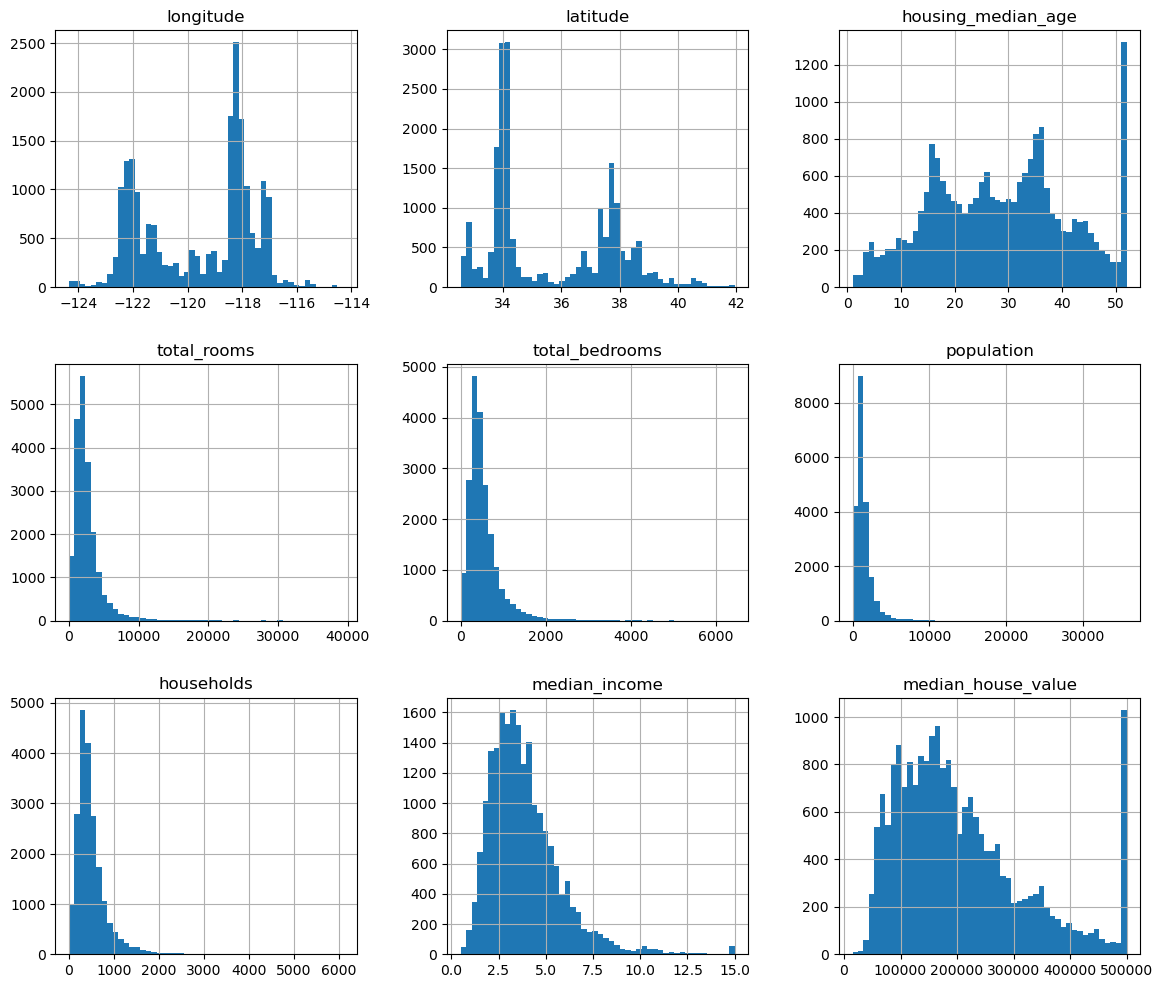

In [9]:
df.hist(figsize = (14,12), bins = 50)
plt.show()

There are some outliers in the data that is mainly skewed right. There are two factors that affect these values and I suspect that it is from population sizes and amount of wealth from people that causes some big outliers in some graphs

# Cleaning the data

In [12]:
df.dropna(inplace = True)

I am removing these values because this can cause noise when running the ML model

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
df["rooms_per_house"] = df.total_rooms.div(df.households)

In [16]:
df.rooms_per_house.sort_values()

5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_house, Length: 20433, dtype: float64

There are at least 2 outliers where the rooms don't make any sense and that is on index 5916 and 8219 because there should be at least 1 room per house

In [18]:
df.drop(index = [5916, 8219], inplace = True)

In [19]:
df["pop_per_house"] = df.population.div(df.households)

In [20]:
df["pop_per_house"].describe()

count    20431.000000
mean         3.071613
std         10.438776
min          0.692308
25%          2.429043
50%          2.817610
75%          3.281519
max       1243.333333
Name: pop_per_house, dtype: float64

In [ ]:
df["bedrooms_per_house"] = df.total_bedrooms.div(df.total_rooms)

In [ ]:
df["bedrooms_per_house"].describe()

count    20431.000000
mean         0.212983
std          0.057672
min          0.100000
25%          0.175426
50%          0.203156
75%          0.239785
max          1.000000
Name: bedrooms_per_room, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20431 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20431 non-null  float64
 1   latitude            20431 non-null  float64
 2   housing_median_age  20431 non-null  float64
 3   total_rooms         20431 non-null  float64
 4   total_bedrooms      20431 non-null  float64
 5   population          20431 non-null  float64
 6   households          20431 non-null  float64
 7   median_income       20431 non-null  float64
 8   median_house_value  20431 non-null  float64
 9   ocean_proximity     20431 non-null  object 
 10  rooms_per_house     20431 non-null  float64
 11  pop_per_house       20431 non-null  float64
 12  bedrooms_per_room   20431 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


# Understanding the data

In [25]:
df.corr(numeric_only = True).median_house_value.sort_values().sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688382
rooms_per_house       0.151264
total_rooms           0.133236
housing_median_age    0.106479
households            0.064827
total_bedrooms        0.049618
pop_per_house        -0.023644
population           -0.025372
longitude            -0.045362
latitude             -0.144692
bedrooms_per_room    -0.256778
Name: median_house_value, dtype: float64

There is a direct correlation between the median household value and the median income which is expected. I would have also expected that there would have been a higher correlation with household value and rooms per house as the more wealth you have the more rooms you would get but that doesn't seem to correlate much. Also the negative correlation to bedrooms suggest that the more wealth you have, the more random rooms you would have besides a bedroom.

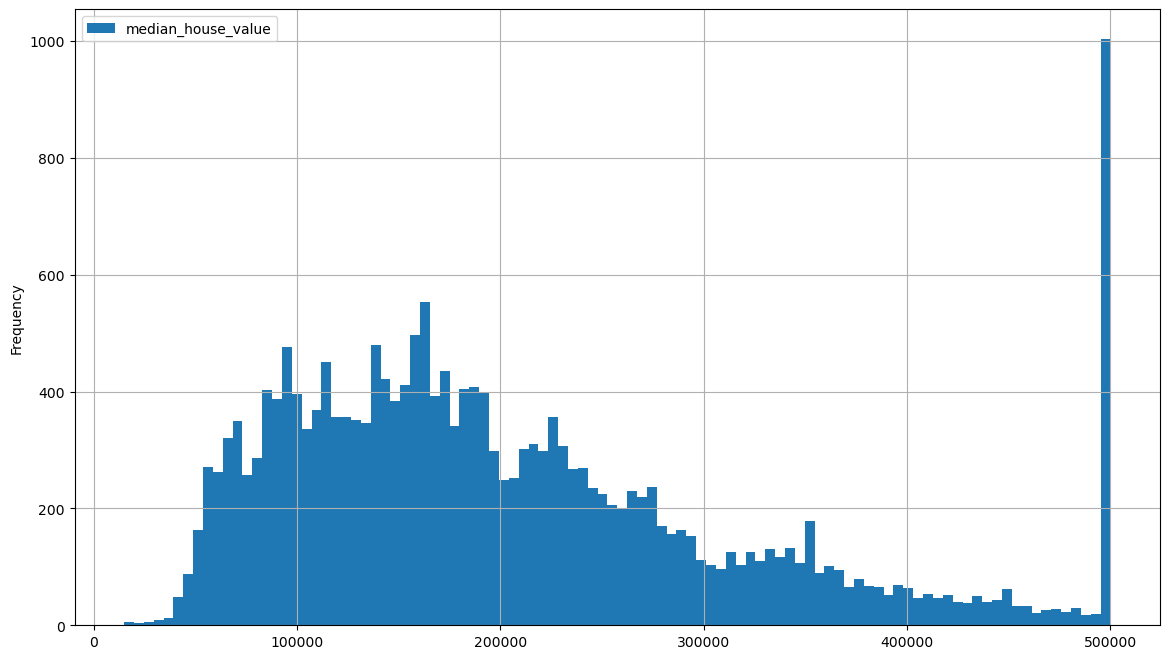

In [ ]:
df.plot(kind="hist", x="bedrooms_per_house", y="median_house_value", bins = 100, figsize = (14,8))
plt.grid(True)
plt.show()

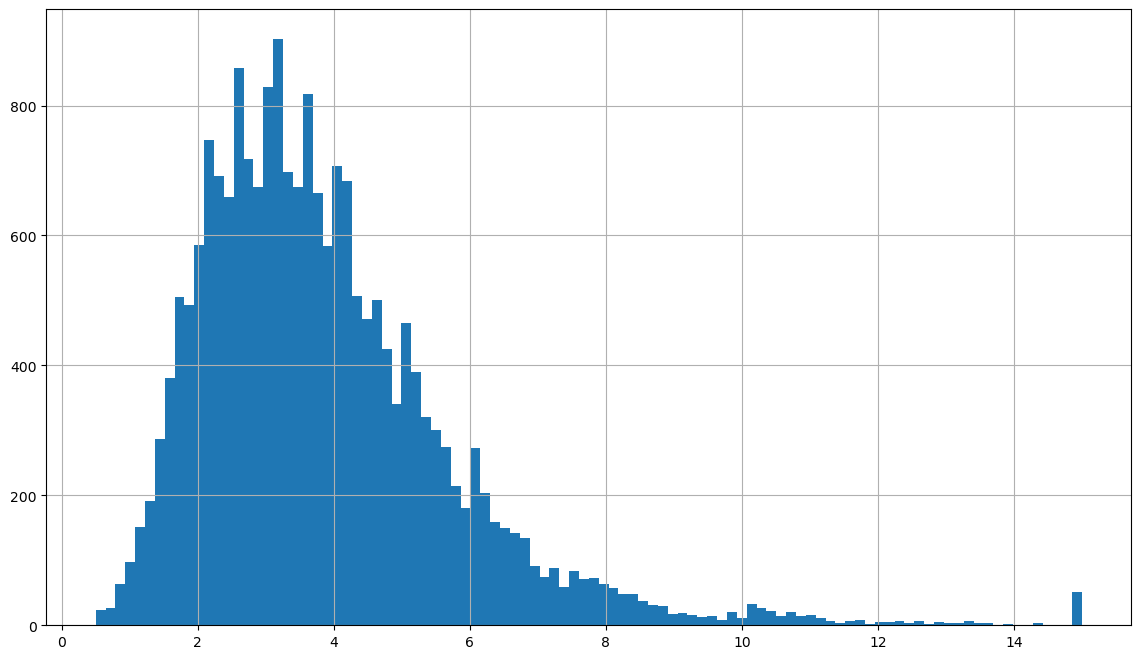

In [28]:
df.median_income.hist(bins = 100, figsize = (14,8), )
plt.show()

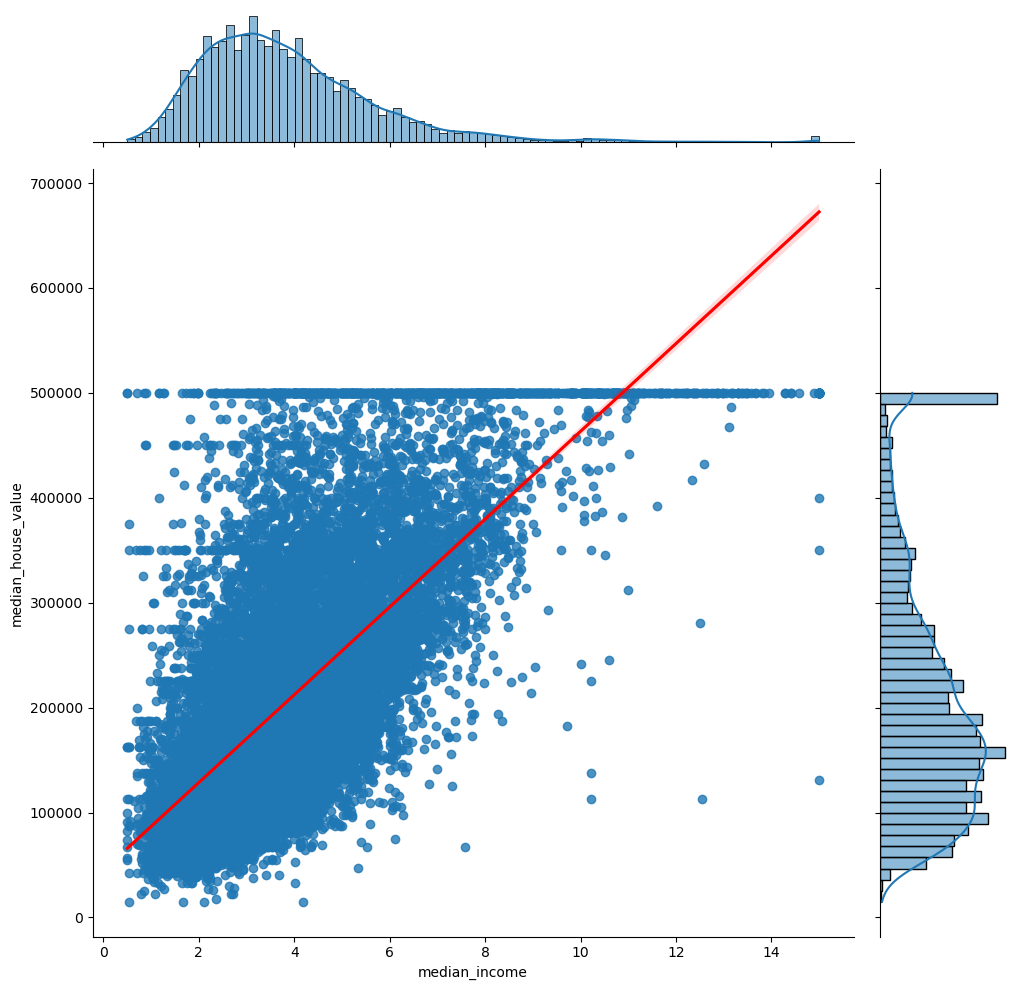

In [29]:
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="reg", height=10, line_kws={'color': 'red'})
plt.show()

This shows a direct correlation between the income and the household value. If you have a lower income then you are more likely to have a lower house value. In contrast, when you have a higher income, then you are more likely to have a higher median house value. of course there will be a some outliers but this does stay mainly true. 

In [31]:
df["income_bracket"] = pd.qcut(df.median_income, q =[0,0.25,0.5,0.75,0.95,1], labels = ["Very_Low", "Below_Average", "Above_Average", "High", "Very_High"])

In [32]:
df.income_bracket.value_counts(normalize = True)

income_bracket
Very_Low         0.250012
Below_Average    0.250012
Above_Average    0.250012
High             0.199941
Very_High        0.050022
Name: proportion, dtype: float64

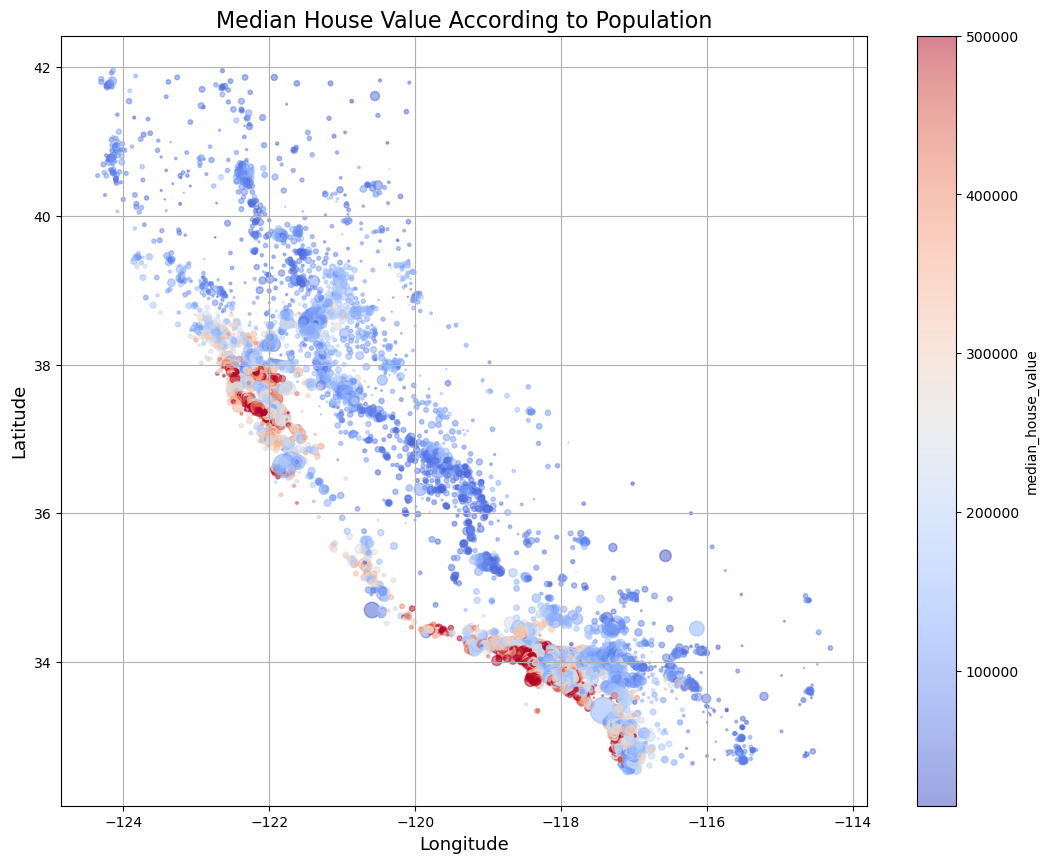

In [33]:
df.plot (kind = "scatter", x = "longitude", y = "latitude", s = df.population/100, c = "median_house_value", cmap = "coolwarm",
        alpha = 0.5, sharex = False, figsize = (13,10))
plt.ylabel("Latitude", fontsize = 13)
plt.xlabel("Longitude", fontsize = 13)
plt.title("Median House Value According to Population", fontsize = 16) 
plt.grid(True)
plt.show()

In [34]:
import matplotlib.image as mpig
california_img = mpig.imread("california.png")

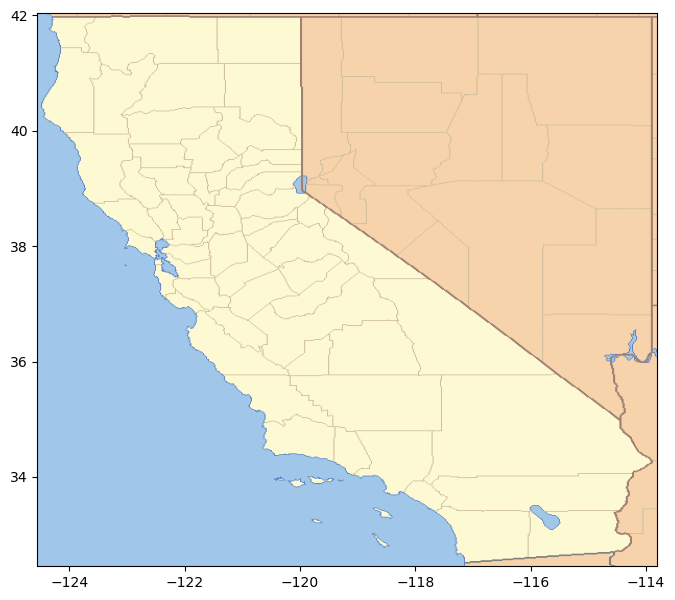

In [35]:
plt.figure(figsize = (8,14))
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05])

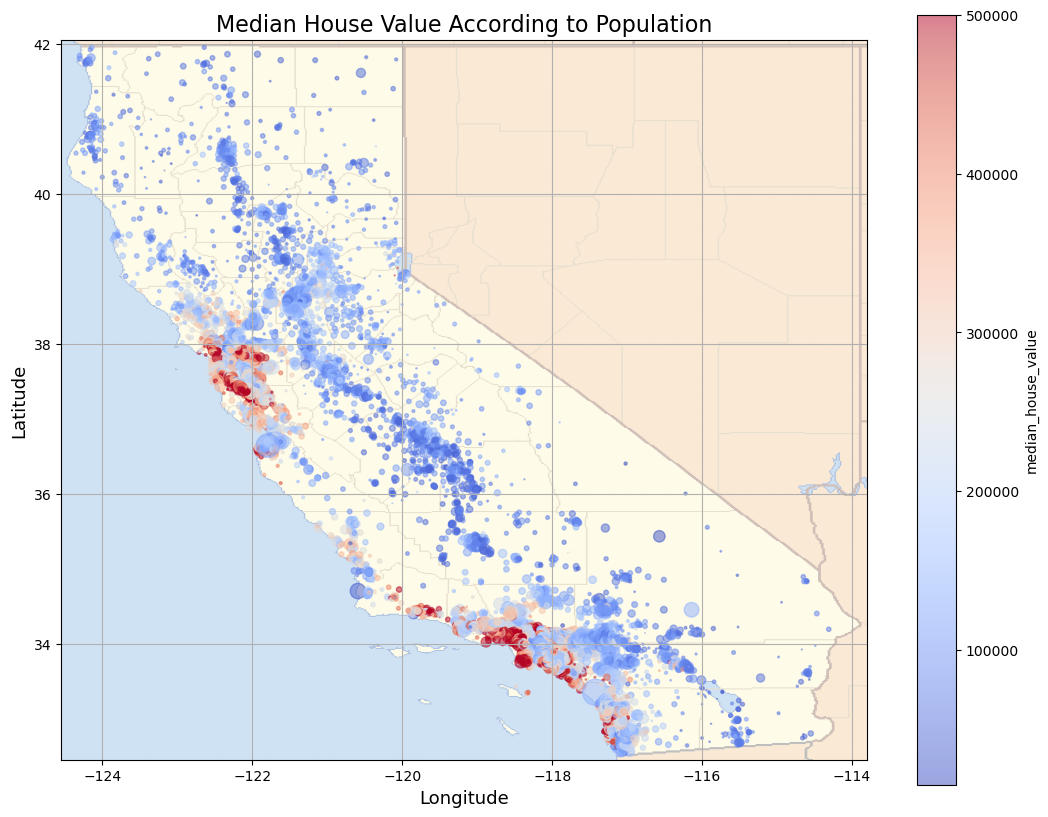

In [36]:
df.plot (kind = "scatter", x = "longitude", y = "latitude", s = df.population/100, c = "median_house_value", cmap = "coolwarm",
        alpha = 0.5, sharex = False, figsize = (13,10))
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5)
plt.ylabel("Latitude", fontsize = 13)
plt.xlabel("Longitude", fontsize = 13)
plt.title("Median House Value According to Population", fontsize = 16) 
plt.grid(True)
plt.show()

This shows that the more inland you are, the cheaper the house value is. And the closer you are to the ocean, the more expensive the house value will be

Since all of the locations are very randomized and do not have many linear relationships, we want to use a random forest regression

<Axes: xlabel='income_bracket', ylabel='count'>

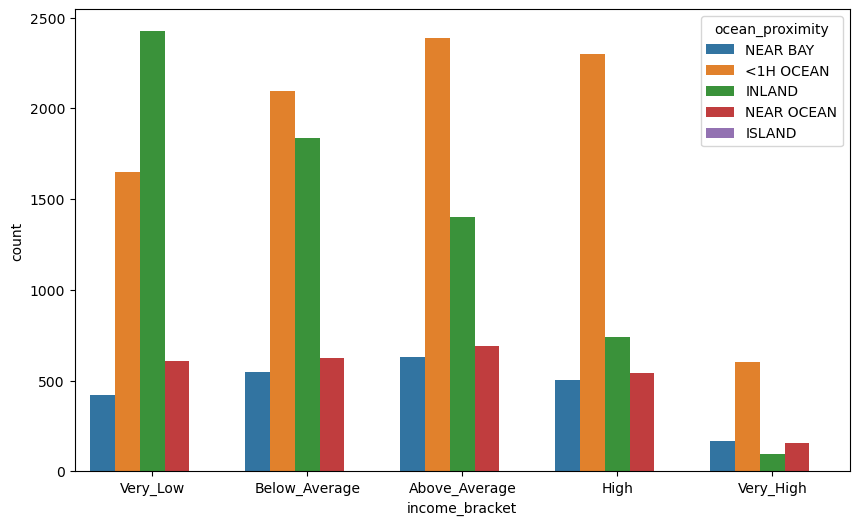

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = "income_bracket", hue = "ocean_proximity")

Further analysis shows that this is true, as you get further away from the inland, the column significantly drops. Also, the Island value is insignificant as there is too much variability.

In [41]:
heat_map = df.groupby(["income_bracket", "ocean_proximity"], observed = False).median_house_value.mean().unstack()

In [42]:
heat_map.drop(columns = ["ISLAND"], inplace = True)

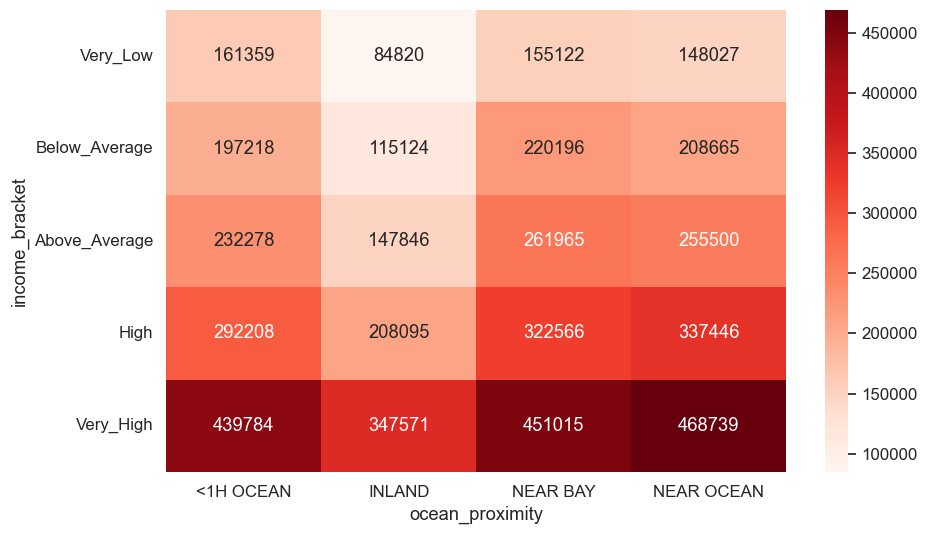

In [43]:
plt.figure(figsize = (10,6))
sns.set(font_scale = 1.1)
sns.heatmap(heat_map.astype("int"), annot = True, fmt = "d", cmap = "Reds")
plt.show()

# Preparing the ML Model

In [45]:
label = df.median_house_value.copy()

In [46]:
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20431, dtype: float64

this value is set for the y values (training and testing) to save all of the median house values

In [48]:
features = df.drop(columns = ["median_house_value"])

This value is for the x values which stores everything else besdies the median house values

In [50]:
import scipy.stats as stats

In [51]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,pop_per_house,bedrooms_per_room
0,-1.327213,1.051622,0.982248,-0.803947,-0.970473,-0.973459,-0.976981,2.345065,0.625288,-0.049438,-1.151239
1,-1.322222,1.042260,-0.606126,2.042056,1.348190,0.861240,1.670296,2.332534,0.324800,-0.092137,-0.991613
2,-1.332204,1.037579,1.855854,-0.535318,-0.825704,-0.819905,-0.843571,1.782863,1.150548,-0.025804,-1.447317
3,-1.337195,1.037579,1.855854,-0.623640,-0.718908,-0.765191,-0.733704,0.932927,0.155306,-0.050167,-0.494619
4,-1.337195,1.037579,1.855854,-0.462097,-0.612112,-0.759014,-0.629068,-0.013149,0.342409,-0.085275,-0.708984


In [52]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20431, dtype: object

In [54]:
features.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9033
INLAND        6496
NEAR OCEAN    2627
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [55]:
dummies = pd.get_dummies(df.ocean_proximity, dtype = "int")

In [56]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [57]:
features = pd.concat([feat1, dummies, df.income_bracket], axis = "columns")

In [58]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,pop_per_house,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_bracket
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.45,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average


# Split the data into a train and test set

In [60]:
X_test = features.sample(frac = 0.3, random_state = 1)

I should be sampling for all income brackets because the testing data could be sampling too much information from a certain imcome bracket and cause variability in the training data but since the training data is large and is reletively the same proportions, this wont happen. 

In [62]:
X_test.income_bracket.value_counts(normalize = True)

income_bracket
Very_Low        0.25
Below_Average   0.25
Above_Average   0.25
High            0.21
Very_High       0.05
Name: proportion, dtype: float64

In [63]:
features.income_bracket.value_counts(normalize = True)

income_bracket
Very_Low        0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very_High       0.05
Name: proportion, dtype: float64

In [64]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

X_train equals the parts where X_test does not equal the parts of features for the testing data

# Testing to see if the testing and training data is set correctly

In [67]:
features.shape

(20431, 17)

In [68]:
X_train.shape

(14302, 17)

In [69]:
X_test.shape

(6129, 17)

In [70]:
X_test.index.isin(features.index).all()  # Should return True

True

In [71]:
len(set(X_train.index) & set(X_test.index))  # Should return 0 to check if there is no overlap of indices

0

# Training the Model

In [73]:
X_train = X_train.sample(frac = 1, random_state = 1)

shuffing the value will ensure that the model is not learning based off of the order but only based off the values

In [75]:
X_train = X_train.drop(columns = ["income_bracket"])
X_test = X_test.drop(columns = ["income_bracket"])

This column is not immportant and can cause problems because it is an object data type and not a float or int 

In [77]:
y_train = label.loc[X_train.index]

This is the model to train my x and y train data by using the value of median home values

In [79]:
y_test = label.loc[X_test.index]

This is the model to test my x and y test data by using the value of median home values

In [81]:
y_train

19654    69500.00
19321   136900.00
15244   393500.00
3710    187500.00
9971    214500.00
           ...   
1309     75800.00
7537    105300.00
17540   193500.00
346      89300.00
19247   156500.00
Name: median_house_value, Length: 14302, dtype: float64

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
forest_reg= RandomForestRegressor(random_state = 50, n_estimators= 100, max_features= "sqrt", max_depth = 100, min_samples_split= 2)

The random state is the same as a random sample.
n_estimators is the number of trees.
max features means it takes the sqrt of number of data values in each row.
max depth is the max depth of the tree.
and it has a minimum sample split of 2.

In [85]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', random_state=50)

What this fit model is doing, is taking the X values and trying to train it as best as possible to the y values (the median household values). As the y values go, it is forming different trees (which is 500 with a max depth of trees of 75) and then it is taking the mean of it together on each row

In [87]:
forest_reg.score(X_train, y_train)

0.9741362284281276

This is a good score since we do not want to have any over fitting, now we will use testing data to see if the model is accurate

In [89]:
from sklearn.metrics import mean_squared_error

This next training model will test the mean squared error, the closer to 0 the better the fit

In [91]:
predictions = forest_reg.predict(X_test)

In [92]:
predictions

array([308589.07, 336618.04, 479112.81, ..., 482811.66, 109033.  ,
       188784.  ])

In [93]:
forest_mse = mean_squared_error(y_test, predictions)

In [94]:
forest_rmse = np.sqrt(forest_mse)

In [95]:
forest_rmse

48866.954409210535

# Testing the Data

In [97]:
y_test.shape

(6129,)

In [98]:
predictions.shape

(6129,)

In [99]:
final = pd.DataFrame({"True_values" : y_test, "Training_Data" : predictions})

In [100]:
final

,True_values,Training_Data
6716,500001.00,308589.07
4121,291500.00,336618.04
14486,500001.00,479112.81
20272,500001.00,417239.33
11845,88200.00,80121.00
...,...,...
8388,179800.00,257318.01
10515,288500.00,310875.03
8884,500001.00,482811.66
9202,122300.00,109033.00


In [101]:
difference = final.True_values.sub(final.Training_Data).abs()
difference

6716    191411.93
4121     45118.04
14486    20888.19
20272    82761.67
11845     8079.00
           ...   
8388     77518.01
10515    22375.03
8884     17189.34
9202     13267.00
5961      2916.00
Length: 6129, dtype: float64

In [102]:
difference_mean = difference.mean()
difference_mean

32701.092807962144